<a href="https://colab.research.google.com/github/anurag4667/Deep_learning/blob/main/stock_market_prediction_updated_multistock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

# Download and reset index
aapl = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
dell = yf.download("DELL", start="2020-01-01", end="2025-01-01")
msft = yf.download("MSFT", start="2020-01-01", end="2025-01-01")


/tmp/ipython-input-12-73171706.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-12-73171706.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dell = yf.download("DELL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-12-73171706.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download("MSFT", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = aapl.reset_index()['Close']
df2 = dell.reset_index()['Close']
df3 = msft.reset_index()['Close']
# df1['Stock_id'] = 1
# df2['Stock_id'] = 2
# df3['Stock_id'] = 3
df1

Ticker,AAPL
0,72.620827
1,71.914795
2,72.487846
3,72.146935
4,73.307526
...,...
1253,257.578674
1254,258.396667
1255,254.974930
1256,251.593079


/tmp/ipython-input-14-2673680819.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-14-2673680819.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-14-2673680819.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


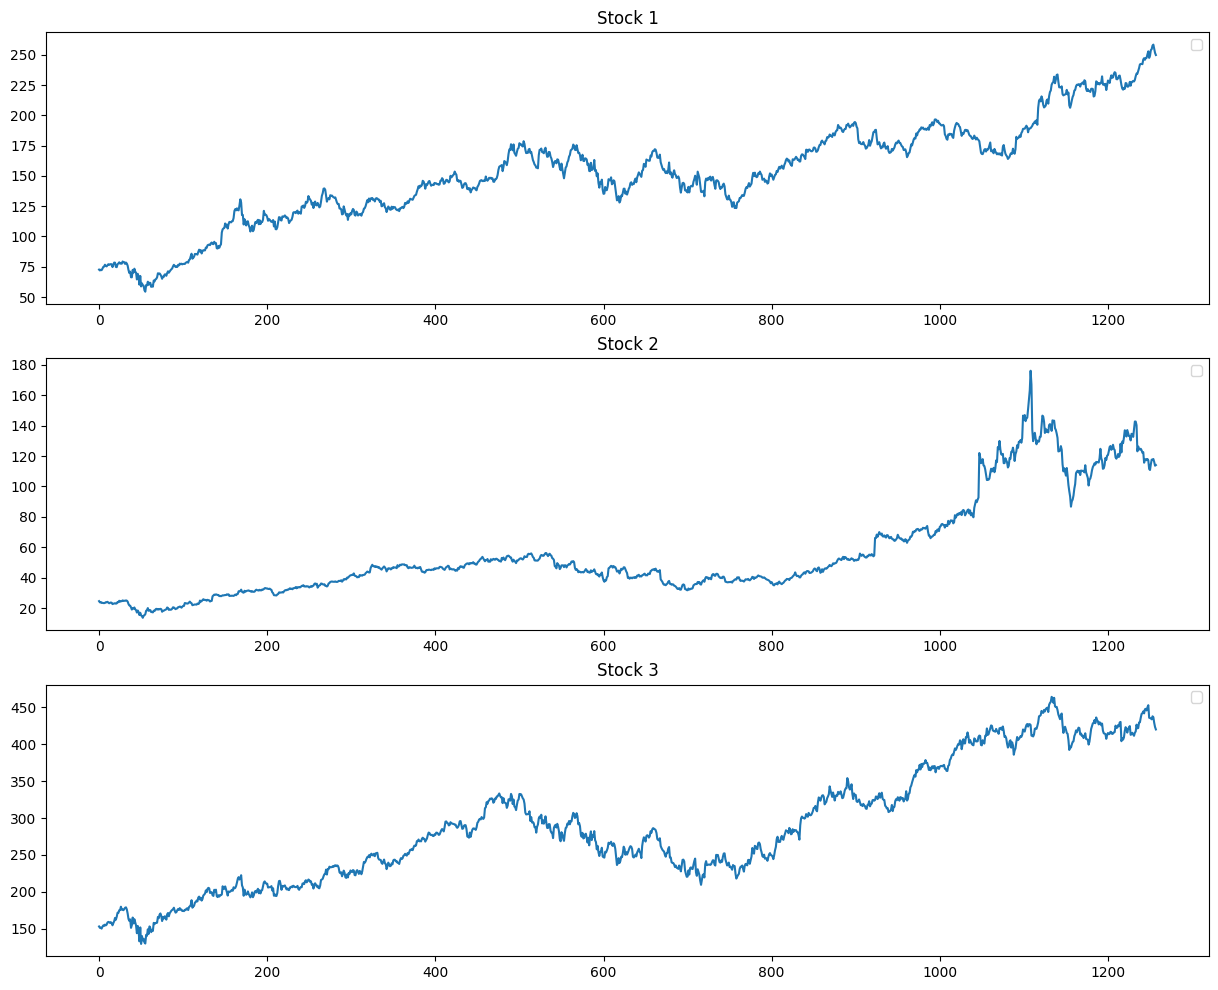

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Stock 1
plt.subplot(3, 1, 1)
plt.plot(df1)
plt.title('Stock 1')
plt.legend()



plt.subplot(3, 1, 2)
plt.plot(df2)
plt.title('Stock 2')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df3)
plt.title('Stock 3')
plt.legend()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
df1 = scaler1.fit_transform(np.array(df1).reshape(-1, 1))

scaler2 = MinMaxScaler()
df2 = scaler2.fit_transform(np.array(df2).reshape(-1, 1))

scaler3 = MinMaxScaler()
df3 = scaler3.fit_transform(np.array(df3).reshape(-1, 1))


In [ ]:
df1

array([[0.08941484],
       [0.08595421],
       [0.08876303],
       ...,
       [0.98322826],
       [0.96665203],
       [0.95794834]])

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data1, test_data1 = df1[0:training_size,:], df1[training_size:len(df1),:1]
train_data2 , test_data2 = df2[0:training_size,:], df2[training_size:len(df2),:1]
train_data3 , test_data3 = df3[0:training_size,:], df3[training_size:len(df3),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_test1, y_test1 = create_dataset(test_data1, time_step)
X_train2 , y_train2 = create_dataset(train_data2, time_step)
X_test2 , y_test2 = create_dataset(test_data2, time_step)
X_train3 , y_train3 = create_dataset(train_data3, time_step)
X_test3 , y_test3 = create_dataset(test_data3, time_step)


len(X_test1)

340

In [ ]:
import numpy as np

# Assign stock IDs (can be any unique integer per stock)
stock_id_1 = np.ones((X_train1.shape[0], 1))        # stock_id = 1
stock_id_2 = np.full((X_train2.shape[0], 1), 2)      # stock_id = 2
stock_id_3 = np.full((X_train3.shape[0], 1), 3)      # stock_id = 3

# Add the stock_id column to the beginning of each X_train
X_train1_tagged = np.hstack((stock_id_1, X_train1))

X_train2_tagged = np.hstack((stock_id_2, X_train2))

X_train3_tagged = np.hstack((stock_id_3, X_train3))

# Assign stock IDs (can be any unique integer per stock)
stock_id_1 = np.ones((X_test1.shape[0], 1))        # stock_id = 1
stock_id_2 = np.full((X_test2.shape[0], 1), 2)      # stock_id = 2
stock_id_3 = np.full((X_test3.shape[0], 1), 3)



X_test1_tagged = np.hstack((stock_id_1, X_test1))
X_test2_tagged = np.hstack((stock_id_2 , X_test2))
X_test3_tagged = np.hstack((stock_id_3, X_test3))
# Combine all X_trains and y_trains
X_train_combined = np.vstack((X_train1_tagged, X_train2_tagged, X_train3_tagged))
y_train_combined = np.concatenate((y_train1, y_train2, y_train3))

X_test_combined = np.vstack((X_test1_tagged, X_test2_tagged, X_test3_tagged))
y_test_combined = np.concatenate((y_test1, y_test2, y_test3))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(101,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 101, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 101, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_combined,y_train_combined, validation_data=(X_test_combined,y_test_combined), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0267 - val_loss: 0.0116
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.6048e-04 - val_loss: 0.0038
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.2517e-04 - val_loss: 0.0035
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2220e-04 - val_loss: 0.0036
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.8471e-04 - val_loss: 0.0047
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.8354e-04 - val_loss: 0.0039
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.9746e-04 - val_loss: 0.0045
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7645e-04 - val_loss: 0.0044
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3102e-04 - val_loss: 0.0046
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7674e-04 - val_loss: 0.0025
Epoch 12/50
34/34 ━━━━━━━━━

In [ ]:
train_predict = model.predict(X_train_combined)
test_predict = model.predict(X_test_combined)

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
stock_ids = X_test_combined[:, 0]
stock_ids

array([1., 1., 1., ..., 3., 3., 3.])

In [ ]:
# Convert predictions to 1D array if needed
y_pred_combined = test_predict.reshape(-1)

# Get predictions and ground truth for each stock
mask1 = stock_ids == 1
mask2 = stock_ids == 2
mask3 = stock_ids == 3

y_pred1 = y_pred_combined[mask1]
y_test1 = y_test_combined[mask1]

y_pred2 = y_pred_combined[mask2]
y_test2 = y_test_combined[mask2]

y_pred3 = y_pred_combined[mask3]
y_test3 = y_test_combined[mask3]


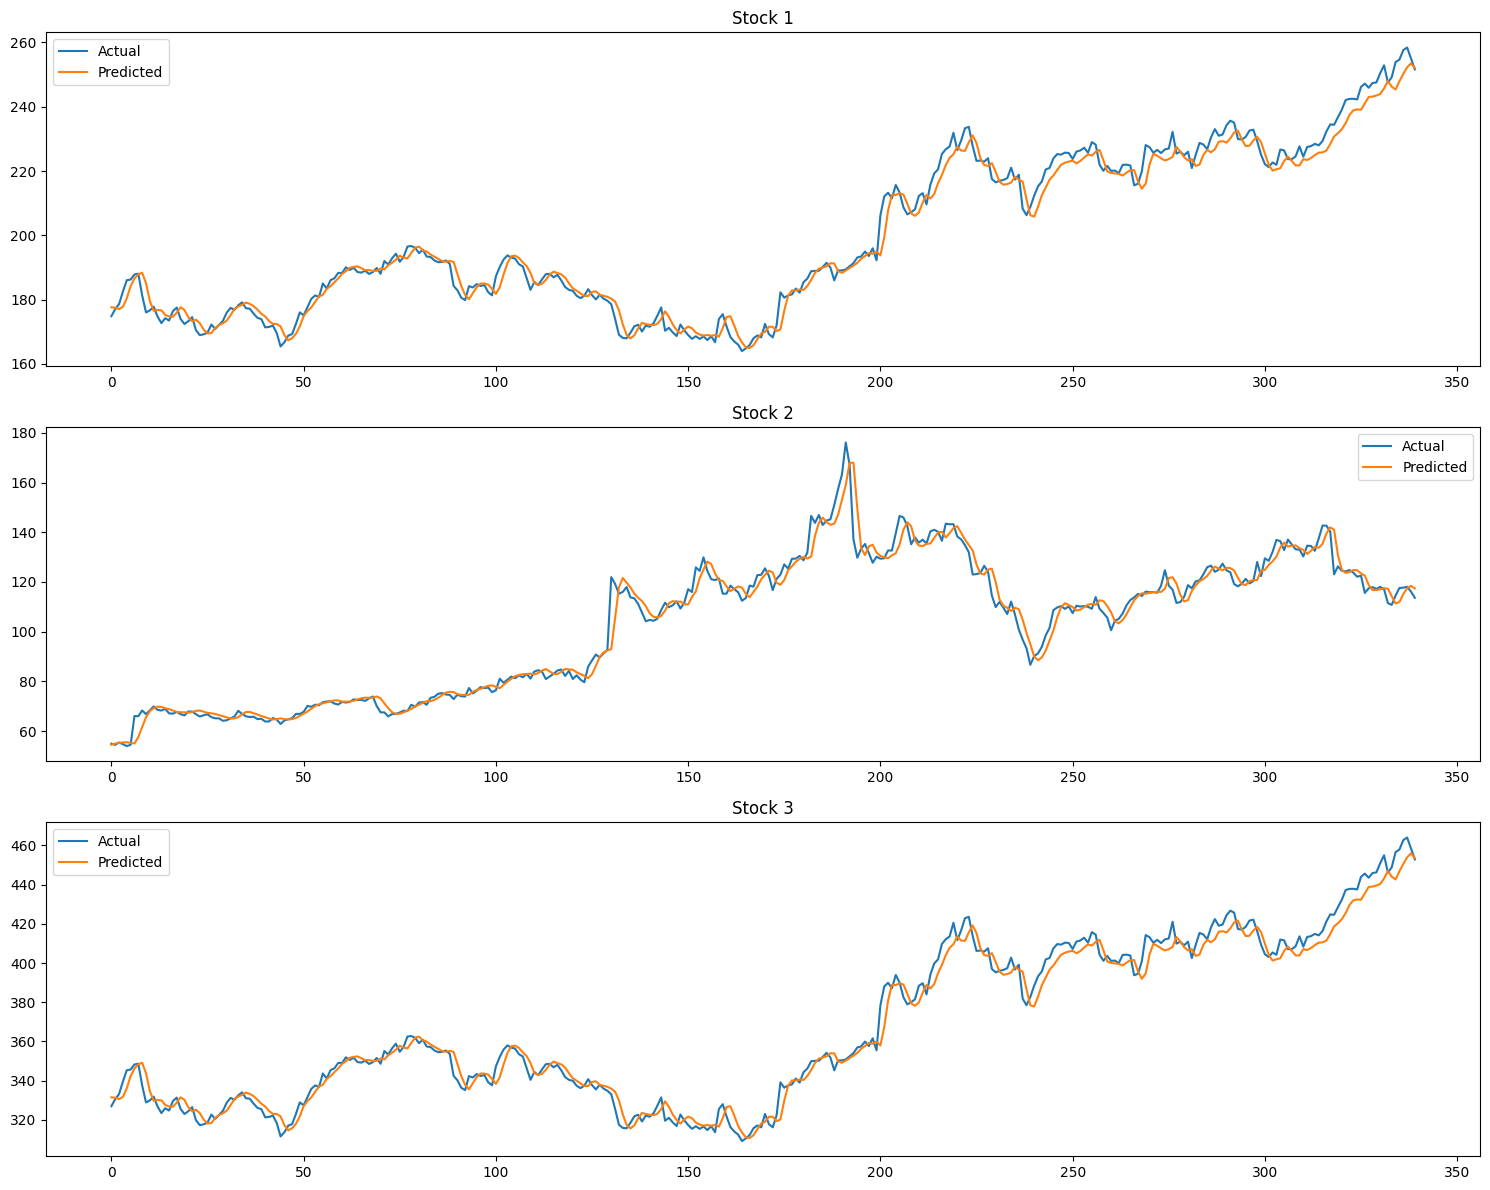

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Stock 1
plt.subplot(3, 1, 1)
plt.plot(scaler1.inverse_transform(y_test1.reshape(-1, 1)), label='Actual')
plt.plot(scaler1.inverse_transform(y_pred1.reshape(-1,1)), label='Predicted')
plt.title('Stock 1')
plt.legend()

# Stock 2
plt.subplot(3, 1, 2)
plt.plot(scaler2.inverse_transform(y_test2.reshape(-1, 1)), label='Actual')
plt.plot(scaler2.inverse_transform(y_pred2.reshape(-1,1)), label='Predicted')
plt.title('Stock 2')
plt.legend()

# Stock 3
plt.subplot(3, 1, 3)
plt.plot(scaler3.inverse_transform(y_test1.reshape(-1, 1)), label='Actual')
plt.plot(scaler3.inverse_transform(y_pred1.reshape(-1,1)), label='Predicted')
plt.title('Stock 3')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
scaler1.inverse_transform(X_test1.reshape(-1, 1))

array([[163.03981018],
       [164.29548645],
       [163.76159668],
       ...,
       [257.57867432],
       [258.39666748],
       [254.97492981]])

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_combined, train_predict))

0.014578994143814724

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test_combined, test_predict))

0.021943437761096873

In [ ]:
X_test_combined

array([[1.        , 0.53260586, 0.53876059, ..., 0.58795476, 0.59470931,
        0.61361298],
       [1.        , 0.53876059, 0.53614372, ..., 0.59470931, 0.61361298,
        0.59057888],
       [1.        , 0.53614372, 0.52708117, ..., 0.61361298, 0.59057888,
        0.60141563],
       ...,
       [3.        , 0.7852511 , 0.79847826, ..., 0.91311117, 0.90909221,
        0.92123836],
       [3.        , 0.79847826, 0.7949786 , ..., 0.90909221, 0.92123836,
        0.91760646],
       [3.        , 0.7949786 , 0.80761277, ..., 0.92123836, 0.91760646,
        0.8950406 ]])

In [ ]:
import pickle

pickle.dump(model, open("sales_pred", 'wb'))

loaded_model = pickle.load(open("sales_pred", 'rb'))

In [ ]:
import pickle

pickle.dump(scaler3, open("scaler3", 'wb'))

scaler1_test = pickle.load(open("scaler1", 'rb'))

In [ ]:
df = pd.DataFrame(scaler1.inverse_transform (X_test1))
df.to_csv("stock1.csv")
x = scaler1_test.transform(np.array(df.iloc[0]).reshape(-1,1))


In [ ]:
y = [np.float64(1)]
for i in x:
  y.append(i[0])

dataX = np.array(y)


In [ ]:
scaler1.inverse_transform(loaded_model.predict(dataX.reshape(1,101,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[177.62419]], dtype=float32)

In [ ]:
df.iloc[1]

,1
0,164.295486
1,163.761597
2,161.912674
3,162.802536
4,160.202194
...,...
95,172.993576
96,174.331985
97,175.710037
98,179.566727


In [ ]:
prev = 0
for i in range(df.shape[0]):
  x = scaler1_test.transform(np.array(df.iloc[i]).reshape(-1,1))
  y = [np.float64(prev)]
  for j in x:
    y.append(j[0])
  dataX = np.array(y)
  print(scaler1_test.inverse_transform(loaded_model.predict(dataX.reshape(1,101,1))), prev)
  prev = scaler1_test.inverse_transform(loaded_model.predict(dataX.reshape(1,101,1)))

